### Imports
Use pillow to convert image to colorvalues in an array.
\
Use matplotlib to display array as a image.

In [2]:
import numpy
from PIL import Image
from matplotlib import pyplot as plt

# Task 1)

### Preperatory work
Before we start the assignment, we need to prepare by converting the attached image into an array with its instesity as an int. There is no RGB value, because we are looking at a black/white image, so we can use the first value only.


In [3]:
image = Image.open("image001.png")

image_array = numpy.asarray(image)

Show image array as an image

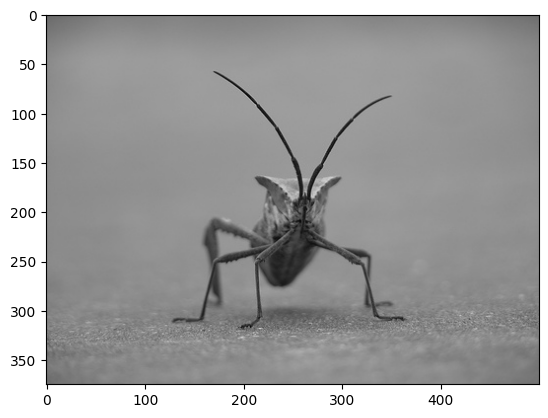

In [4]:
plt.imshow(image_array, cmap='gray')
plt.show()

## Task A) & B)
Calculate the derivative for the x direction and the y direction and map them into seperate arrays. \
Calculate them using the formula: $$f_x(x,y) \approx \frac{f(x+\Delta x,y) - f(x-\Delta x,y)}{2\cdot \Delta x}$$ where $\Delta x = 1$

Finds the derivative in x direction for a point in position x, y.
This is done by finding the value of the previous pixel and also the next pixel (In the x direction), and subtracting them and dividing it by 2. The function returns said derivitive in the specified position.

In [5]:
def find_fx(x, y):
    if image_array[x+1][y][0] >image_array[x-1][y][0]:
        fx = (image_array[x+1][y][0]-image_array[x-1][y][0])/2
    else:
        fx = (image_array[x-1][y][0]-image_array[x+1][y][0])/2
    return fx

Create an array filled with zeroes in the correct shape, using numpys shape function.


In [6]:
fx_matrix = numpy.zeros((image_array.shape[0], image_array.shape[1]))

Double for loop to go through all the elements/pixel of the image, and run it through find_fx to find the derivative of all the points in the picture and append them to the fx_matrix.

In [7]:

for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        fx_matrix[i][j] = find_fx(i, j)


The same as with finding Fx, but in y direction

In [8]:

def find_fy(x, y):
    if image_array[x][y+1][0] >image_array[x][y-1][0]:
        fy = (image_array[x][y+1][0]-image_array[x][y-1][0])/2
    else:
        fy = (image_array[x][y-1][0]-image_array[x][y+1][0])/2
    return fy

fy_matrix = numpy.zeros((image_array.shape[0], image_array.shape[1]))

for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        fy_matrix[i][j] = find_fy(i, j)


Show f_x array as an image

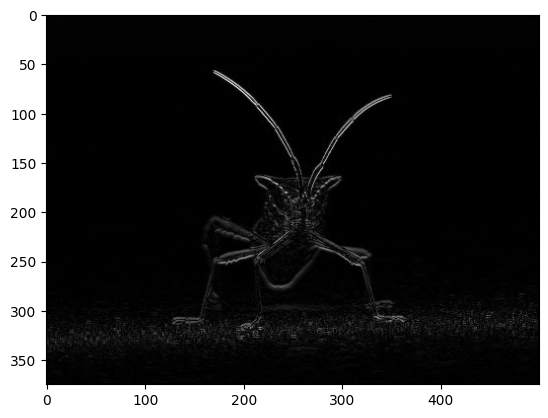

In [9]:
plt.imshow(fx_matrix, cmap='gray')
plt.show()

Show f_y as an image




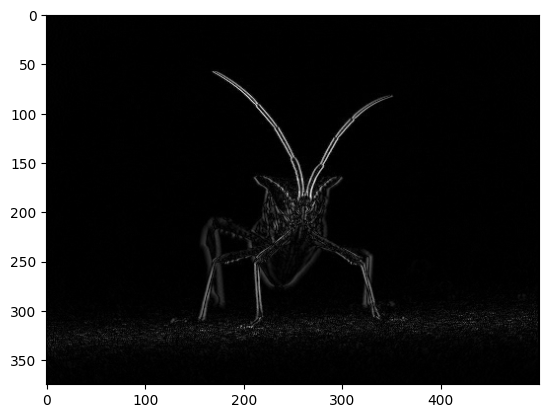

In [10]:
plt.imshow(fy_matrix, cmap='gray')
plt.show()

## Task c)
Calculate the length of the gradient for each point and append them to a matrix named `fgradabs` and draw the image.

Create the array in the correct shape and for loop through all the elements. It then finds then finds the length of the gradient in the corresponding pixel and appends it into the fgradabs array
\
The length of the gradient is calculated with the formula: $$|\nabla f|=\sqrt{f_x^2 + f_y^2 }.$$

In [11]:
fgradabs = numpy.zeros((image_array.shape[0], image_array.shape[1]))

for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        fgradabs[i][j] = numpy.sqrt(fx_matrix[i][j]**2 + fy_matrix[i][j]**2)



Display fgradabs as an image

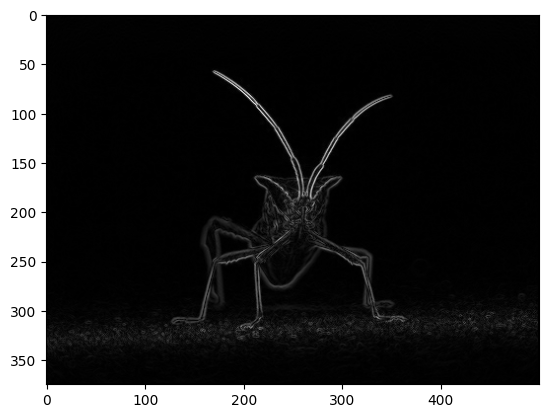

In [12]:
plt.imshow(fgradabs, cmap='gray')
plt.show()

## Task d)
Find the highest and lowest value in fgradabs and then scale all the values between 0 and 1. Append the result in a matrix with the same name and display it. It should display the same image as in task c)

In [13]:
highest_value = fgradabs[0][0]
lowest_value = fgradabs[0][0]
for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        if fgradabs[i][j] > highest_value:
            highest_value = fgradabs[i][j]
        if fgradabs[i][j] < lowest_value:
            lowest_value = fgradabs[i][j]

            

print(highest_value, lowest_value)


125.88288207695278 0.0


Scale all the values by substracting by the lowest value and dividing by the difference between the highest and lowest value.

In [14]:
fgradabs = (fgradabs - lowest_value) / (highest_value - lowest_value)

Show the new image with scaled values.

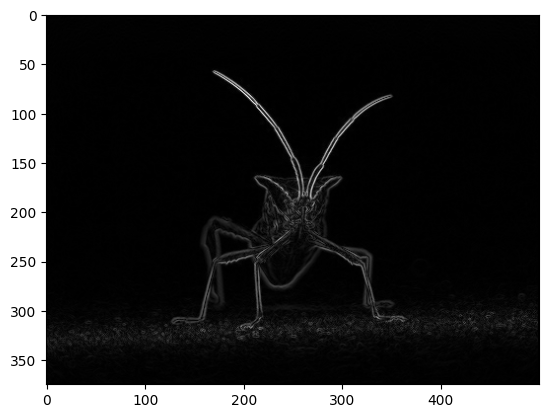

In [15]:
plt.imshow(fgradabs, cmap='gray')
plt.show()

## Task e)
There are no true edges in real life, but only what we precieve as edges. Edges are basically high contrast between color, so we can detect edges by looking where there is a large gap in the color value. We are obviously looking at a black/white image, so we are looking at the black/white contrast. We have already mapped the gradients, so we can look where there are jumps and where they are smooth and determine where the edges are.




## Task f)
Let c be a number between 0 and 1 and go through all the values in fgradabs. If the element is higher than c, then it is set to 1, if it is lower, it is set to 0. Put these new values of 0/1 into a new matrix called `edges`

Define a function that determines if a element is higher or lower than c. Then vectorize is and make it a universal function so that it can operate element wise throgh an array 

*Vectorize is a numpy function that turns a function that normally only operate on singe elements and turns it into a function that can go through all elements in an array and perform its task. This is called a universal function (ufunc).*

In [16]:
def determineEdge(x, c):
    if x > c:
        return 1
    else:
        return 0

vDetermineEdge = numpy.vectorize(determineEdge)

edges = vDetermineEdge(fgradabs, 0.1)

Show edges matrix as image

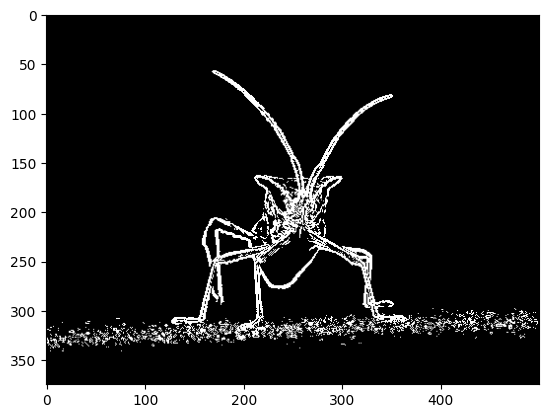

In [17]:
plt.imshow(edges, cmap='grey')
plt.show()

## Task g)
The displayed image does not represent the edges very well with all the noise that creates "edges", where they should not be. In the next part we are going to try to reduce the noise with image diffusion.

# Task 2

## a)
What form does the Fricks first law of diffusion take?

$J(F,x,t)$ = $a\frac{\partial F}{\partial x}$

Where ¨
J is the flux of the substance
F is the substance
x is the position
a is the diffusioncoeffisent

# Task 3

$$F_{xx}(x,y,t) \approx \frac{F_x(x+\Delta x,y,t) - F_x(x-\Delta x,y,t)}{2\Delta x}$$

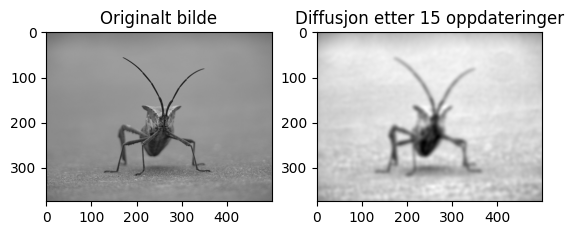

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å beregne F_xx og F_yy numerisk
def calculate_partial_derivatives(F, delta):
    F_x = (np.roll(F, shift=-1, axis=0) - np.roll(F, shift=1, axis=0)) / (2 * delta)
    F_y = (np.roll(F, shift=-1, axis=1) - np.roll(F, shift=1, axis=1)) / (2 * delta)
    F_xx = (np.roll(F_x, shift=-1, axis=0) - np.roll(F_x, shift=1, axis=0)) / (2 * delta)
    F_yy = (np.roll(F_y, shift=-1, axis=1) - np.roll(F_y, shift=1, axis=1)) / (2 * delta)
    return F_xx, F_yy

# Implementering av numerisk integrasjon for større bilde
def diffuse_image(initial_image, delta_t, num_updates):
    F = initial_image.copy()
    delta_x, delta_y = 1, 1  # Delta x og Delta y kan tilpasses
    g = 1  # Konstant g

    for _ in range(num_updates):
        F_x = g * calculate_partial_derivatives(F, delta_x)[0]
        F_y = g * calculate_partial_derivatives(F, delta_y)[1]

        F_xx, F_yy = calculate_partial_derivatives(F, delta_x)
        
        delta_F = F_xx + F_yy
        F = F + delta_t * delta_F.astype(np.float64)  # Ensure float64 type for intermediate calculations

    # Normalize the image to the range [0, 1] before converting to uint8
    F_normalized = (F - F.min()) / (F.max() - F.min())
    F_uint8 = (F_normalized * 255).astype(np.uint8)

    return F_uint8

# Eksempel på bruk:
# initial_image er bildet ved t=0, delta_t er steglengden, og num_updates er antall oppdateringer
initial_image = image_array# Eksempel på tilfeldig initialbilde
delta_t = 0.5
num_updates = 15

diffused_image = diffuse_image(initial_image, delta_t, num_updates)

# Visning av bildene
plt.subplot(1, 2, 1)
plt.imshow(initial_image, cmap='gray')
plt.title('Originalt bilde')

plt.subplot(1, 2, 2)
plt.imshow(diffused_image, cmap='gray')
plt.title('Diffusjon etter {} oppdateringer'.format(num_updates))

plt.show()




### b) Eksperimenter med ulike verdier for $\Delta t$ og antall oppdateringer:  
Eksperimenter med ulike verdier for delta_t og num_updates og observer hvordan diffusjonen påvirker det større bildet.

### c) Gjennomføring av analyse:  
Fortsett analysen fra Oppgave 1 ved å bruke algoritmen på det større bildet. Juster parametrene $c$, $\Delta t$ og antall oppdateringer for å oppnå en god balanse mellom glatting og bevaring av kanter. Experiment med ulike verdier og observer resultatene.

# Task 4  
a)  
i) Hva vil $g(|\nabla F|)$ gjøre med store verdier av $g(|\nabla F|)$?  
For store verdier av $|\nabla F|$, vil $g(|\nabla F|)$ nærme seg 1. Dette betyr at diffusjonen blir minimal, og skarpe kanter vil bli bevart.  
ii) Hva vil $g(|\nabla F|)$ gjøre med små verdier av $|\nabla F|$?   
For små verdier av $|\nabla F|$, vil $g(|\nabla F|)$ nærme seg 0. Dette betyr at diffusjonen blir større, og glattingen av bildet vil skje.
iii) Hvilken innflytelse har $\lambda$ for hva som skjer i) og ii)?  
$\lambda$ fungerer som en parameter som styrer overgangen mellom minimal diffusjon (bevaring av skarpe kanter) og økende diffusjon (glatting). Jo større $\lambda$, jo mer vil små verdier av $|\nabla F|$ påvirke $g(|\nabla F|)$, og dermed vil diffusjonen øke selv for mindre gradientverdier.

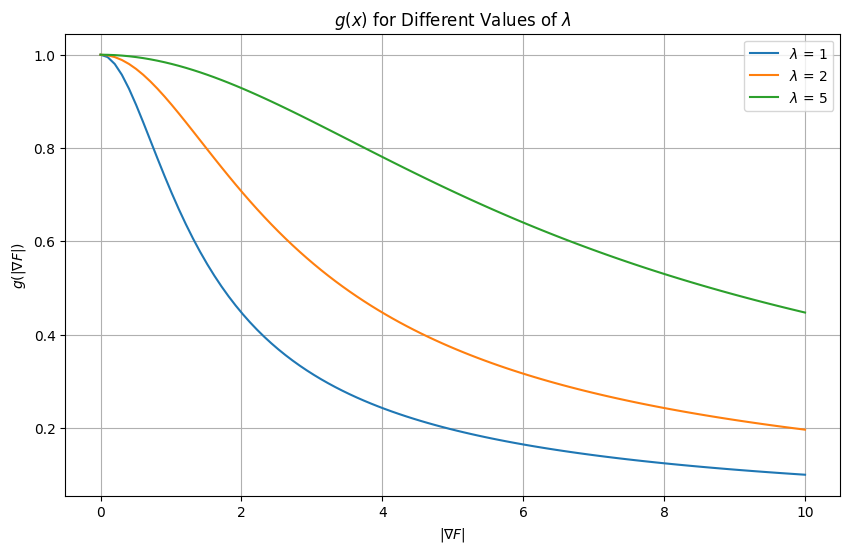

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def g(x, lam):
    return 1 / np.sqrt(1 + (x**2) / (lam**2))

x_values = np.linspace(0, 10, 100)
lambda_values = [1, 2, 5]

plt.figure(figsize=(10, 6))

for lam in lambda_values:
    plt.plot(x_values, g(x_values, lam), label=f'$\lambda$ = {lam}')

plt.title('$g(x)$ for Different Values of $\lambda$')
plt.xlabel('$|\\nabla F|$')
plt.ylabel('$g(|\\nabla F|)$')
plt.legend()
plt.grid(True)
plt.show()


### b)

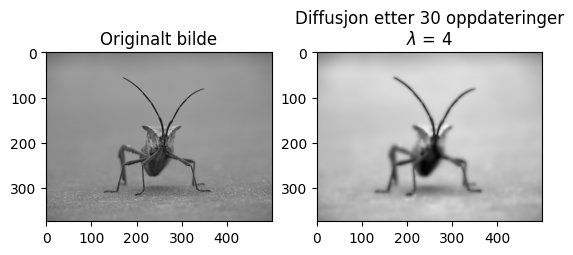

In [47]:
def calculate_partial_derivatives(F, delta):
    F_x = (np.roll(F, shift=-1, axis=0) - np.roll(F, shift=1, axis=0)) / (2 * delta)
    F_y = (np.roll(F, shift=-1, axis=1) - np.roll(F, shift=1, axis=1)) / (2 * delta)
    F_xx = (np.roll(F_x, shift=-1, axis=0) - np.roll(F_x, shift=1, axis=0)) / (2 * delta)
    F_yy = (np.roll(F_y, shift=-1, axis=1) - np.roll(F_y, shift=1, axis=1)) / (2 * delta)
    return F_xx, F_yy

def diffuse_image_with_gradient_function(initial_image, delta_t, num_updates, lam):
    F = initial_image.copy()
    delta_x, delta_y = 1, 1  # Delta x og Delta y kan tilpasses

    for _ in range(num_updates):
        F_x = calculate_partial_derivatives(F, delta_x)[0]
        F_y = calculate_partial_derivatives(F, delta_y)[1]

        gradient_magnitude = np.sqrt(F_x**2 + F_y**2)
        g_value = 1 / np.sqrt(1 + (gradient_magnitude**2) / (lam**2))

        F_xx, F_yy = calculate_partial_derivatives(F, delta_x)
        delta_F = F_xx + F_yy

        F = F + delta_t * g_value * delta_F

    return F

# Eksempel på bruk:
# initial_image er bildet ved t=0, delta_t er steglengden, og num_updates er antall oppdateringer
initial_image = image_array  # Eksempel på tilfeldig initialbilde
delta_t = 0.3
num_updates = 30
lam = 4

diffused_image = diffuse_image_with_gradient_function(initial_image, delta_t, num_updates, lam)

# Visning av bildene
plt.subplot(1, 2, 1)
plt.imshow(initial_image, cmap='grey')
plt.title('Originalt bilde')

# Normalize and convert the diffused image to uint8
diffused_image_normalized = (diffused_image - diffused_image.min()) / (diffused_image.max() - diffused_image.min())
diffused_image_uint8 = (diffused_image_normalized * 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(diffused_image_uint8, cmap='grey')
plt.title(f'Diffusjon etter {num_updates} oppdateringer\n$\lambda$ = {lam}')

plt.show()




### c) Eksperimenter med ulike antall oppdateringer og ulike verdier for Δt og λ  
Eksperimenter med ulike verdier for delta_t, num_updates, og lam for å observere hvordan diffusjonen påvirkes. Prøv forskjellige kombinasjoner og observer resultatene.

### d) Gjennomføring av analyse
Gjennomfør analysen fra Oppgave 1 ved å bruke algoritmen på det større bildet med g(∣∇F∣). Juster parametrene 
c, λ, Δt, og antall oppdateringer for å oppnå en god balanse mellom glatting og bevaring av kanter. Eksperimenter med ulike verdier og observer resultatene

In [22]:
image = Image.open("image001.png")

image_array = numpy.asarray(image)



array([[[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       ...,

       [[112, 112, 112],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [115, 115, 115]],

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [114, 114, 114]],

       [[113, 113, 113],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [113, 113, 113]]

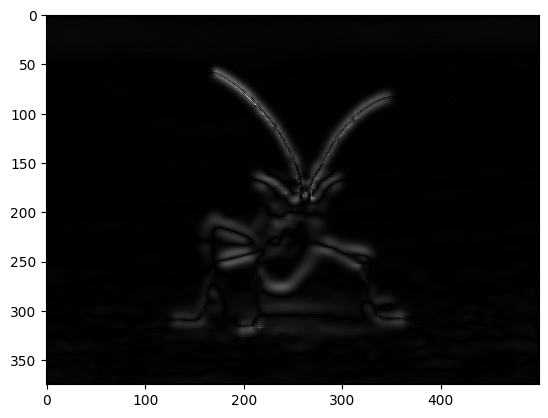

In [32]:
def find_fx(x, y):
    if diffused_image_uint8[x+1][y][0] > diffused_image_uint8[x-1][y][0]:
        fx = (diffused_image_uint8[x+1][y][0]-diffused_image_uint8[x-1][y][0])/2
    else:
        fx = (diffused_image_uint8[x-1][y][0]-diffused_image_uint8[x+1][y][0])/2
    return fx

fx_matrix = numpy.zeros((diffused_image_uint8.shape[0], diffused_image_uint8.shape[1]))
for i in range(0, diffused_image_uint8.shape[0]-1):
    for j in range(0, diffused_image_uint8.shape[1]-1):
        fx_matrix[i][j] = find_fx(i, j)

plt.imshow(fx_matrix, cmap='gray')
plt.show()

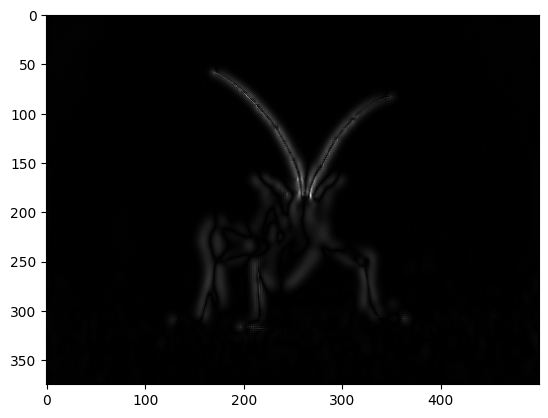

In [33]:

def find_fy(x, y):
    if diffused_image_uint8[x][y+1][0] >diffused_image_uint8[x][y-1][0]:
        fy = (diffused_image_uint8[x][y+1][0]-diffused_image_uint8[x][y-1][0])/2
    else:
        fy = (diffused_image_uint8[x][y-1][0]-diffused_image_uint8[x][y+1][0])/2
    return fy

fy_matrix = numpy.zeros((diffused_image_uint8.shape[0], diffused_image_uint8.shape[1]))

for i in range(0, diffused_image_uint8.shape[0]-1):
    for j in range(0, diffused_image_uint8.shape[1]-1):
        fy_matrix[i][j] = find_fy(i, j)

plt.imshow(fy_matrix, cmap='gray')
plt.show()

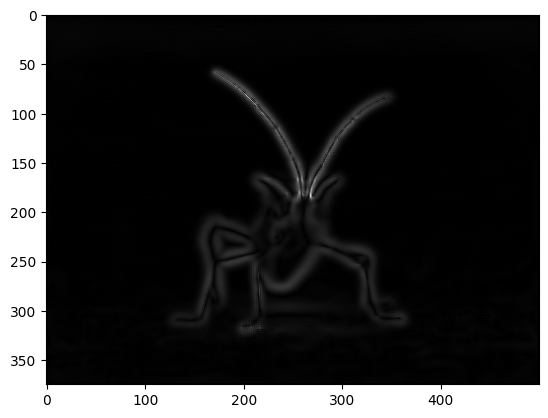

In [35]:
fgradabs = numpy.zeros((image_array.shape[0], image_array.shape[1]))

for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        fgradabs[i][j] = numpy.sqrt(fx_matrix[i][j]**2 + fy_matrix[i][j]**2)

plt.imshow(fgradabs, cmap='gray')
plt.show()

In [39]:
highest_value = fgradabs[0][0]
lowest_value = fgradabs[0][0]
for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        if fgradabs[i][j] > highest_value:
            highest_value = fgradabs[i][j]
        if fgradabs[i][j] < lowest_value:
            lowest_value = fgradabs[i][j]

            
fgradabs = (fgradabs - lowest_value) / (highest_value - lowest_value)

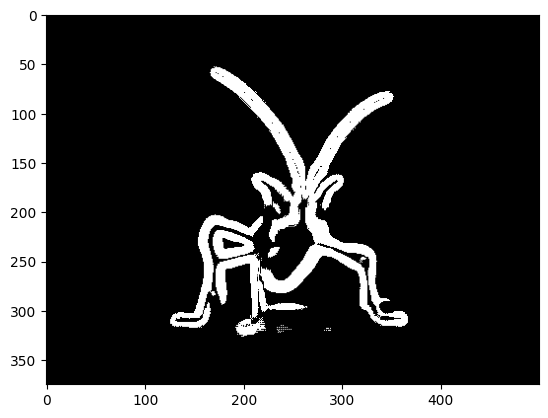

In [46]:
def determineEdge(x, c):
    if x > c:
        return 1
    else:
        return 0

vDetermineEdge = numpy.vectorize(determineEdge)

edges = vDetermineEdge(fgradabs, 0.07)

plt.imshow(edges, cmap='grey')
plt.show()